In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


Based on the feedback through tensorboard, my best model was Run-1, this might differ for you, especially if you've changed the yaml file

In [2]:
data = np.load('fishing_data_test.npz')
test_inputs = data['inputs']
test_targets = data['targets']
model = tf.keras.models.load_model('models/run-1_20250217-155440.h5')
predictions = model.predict(test_inputs)

2025-02-17 16:49:15.766860: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-02-17 16:49:15.766880: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-17 16:49:15.766886: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-17 16:49:15.766920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-17 16:49:15.766941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


122/988 [==>...........................] - ETA: 1s

2025-02-17 16:49:16.050049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


988/988 [==============================] - 1s 1ms/step


In [3]:
cr = pd.DataFrame(classification_report(y_true=test_targets, y_pred=np.round(predictions), output_dict=True)).T
cr["support"] = cr["support"].apply(int)
cr.style.background_gradient(cmap='viridis',subset=pd.IndexSlice['0':'1', :'f1-score'])

,precision,recall,f1-score,support
0,0.715329,0.834649,0.770396,19250
1,0.651331,0.481848,0.553915,12340
accuracy,0.696834,0.696834,0.696834,0
macro avg,0.683330,0.658249,0.662156,31590
weighted avg,0.690329,0.696834,0.685832,31590


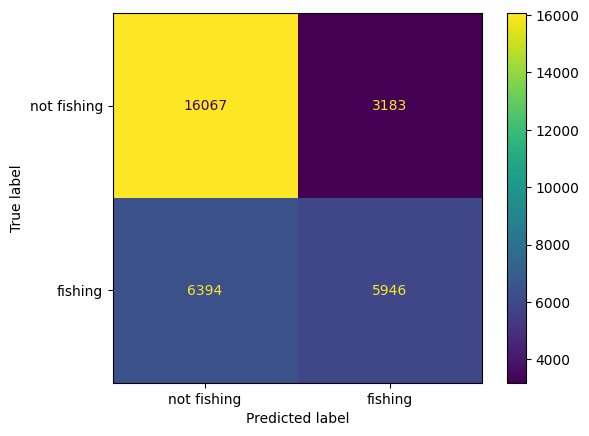

In [4]:
cm=confusion_matrix(y_true=test_targets,y_pred=np.round(predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["not fishing","fishing"])
disp.plot()
plt.show()

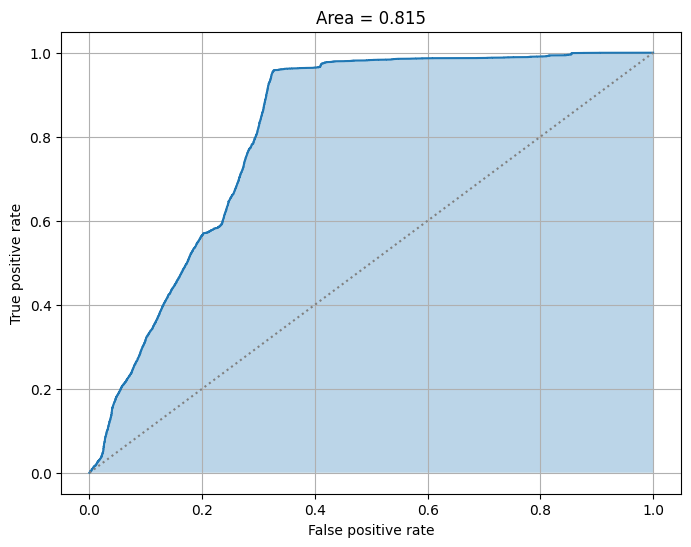

In [5]:
score = roc_auc_score(y_true=test_targets, y_score=predictions)
fpr, tpr, thresholds = roc_curve(y_true=test_targets, y_score=predictions)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.fill_between(x=fpr,y1 = np.zeros(len(fpr)), y2=tpr, alpha=0.3)
plt.plot([0,1],[0,1],color="gray",linestyle=":")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(f"Area = {score:.3f}")
plt.grid()
plt.show()

Overall this model is decent, but significantly underpredicts the number of boats fishing. It's unlikely that this can be solved purely with changing the architecture of the model (number of layers etc), but instead would require more thorough feature engineering. I would want to experiment with additional aggregated features for each boat, as well as changing the lat/lon into something more like a one-hot encoded variable as discussed in the EDA. However, this would have to be done with adding an excessive number of features to this model.